In [1]:
from scipy import stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Распределение $χ^2 (n=10)$ 

In [2]:
chi2 = sts.chi2(10)

## Задание 1

### Расмотрим выборки из 10, 500 и 10000 элементов

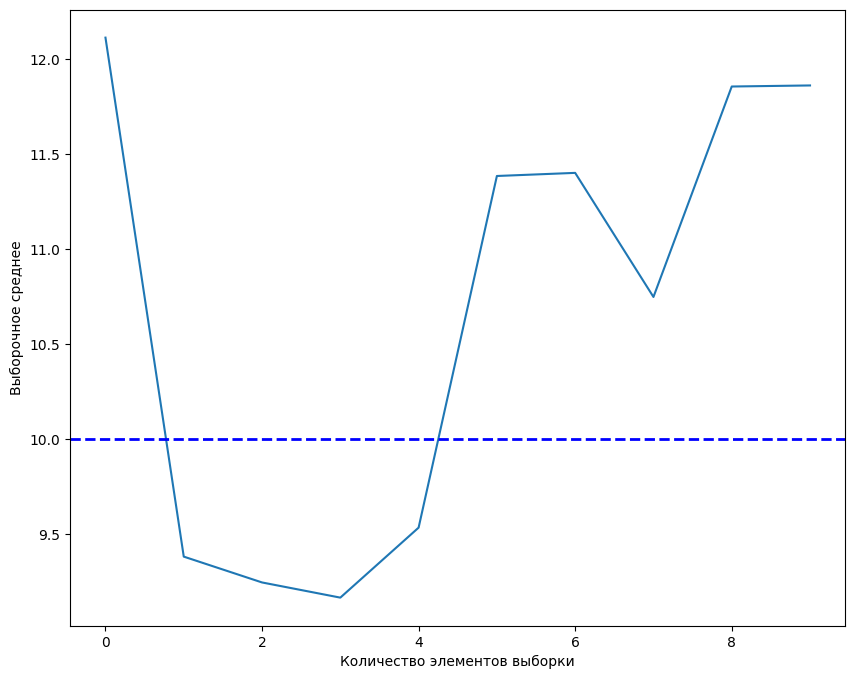

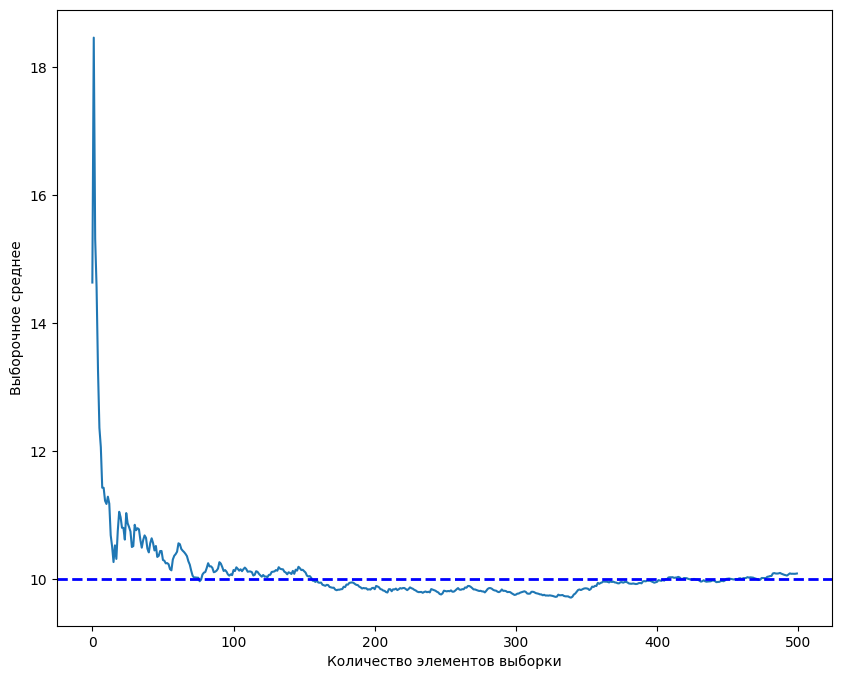

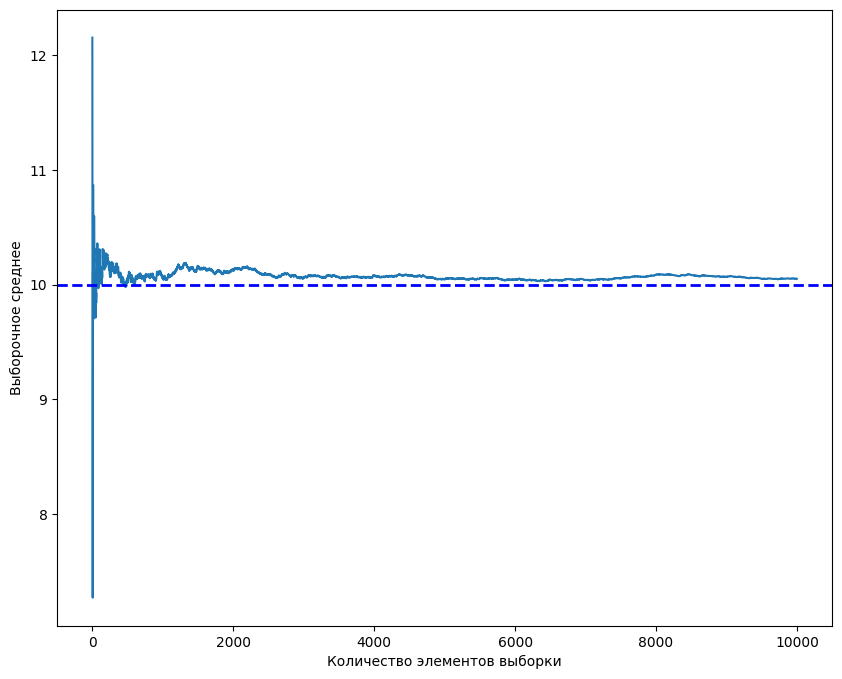

In [3]:
n = [10, 500, 10000]
X = []
for n_obs in n:
    x = chi2.rvs(n_obs)
    X.append(x)
    x_cumsum = np.cumsum(x)
    x_mean = x_cumsum / np.arange(1, n_obs+1)
    plt.figure(figsize=(10,8))
    plt.plot(x_mean)
    plt.axhline(10, color='b', linestyle='dashed', linewidth=2)
    plt.xlabel('Количество элементов выборки')
    plt.ylabel('Выборочное среднее')
    plt.show()


При увелечении объема выборки выборочное среднее стремится к истинному математическому ожиданию (ЗБЧ)

## Задание 2

### Теперь посмотрим на выполнение центральной предельной теоремы

In [4]:
n_obs = 10**5

x1 = chi2.rvs(n_obs)
x2 = chi2.rvs(n_obs)
x3 = chi2.rvs(n_obs)
x4 = chi2.rvs(n_obs)
x5 = chi2.rvs(n_obs)

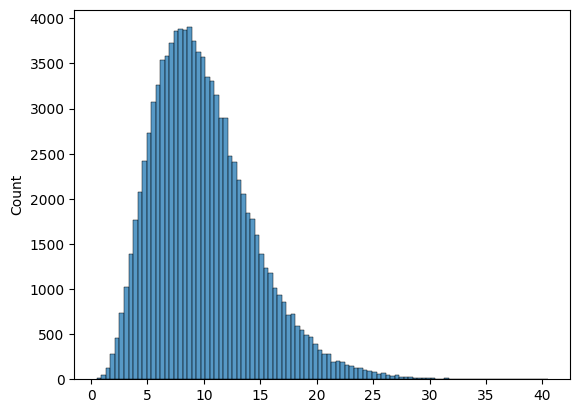

In [5]:
sns.histplot(x1, bins=100);

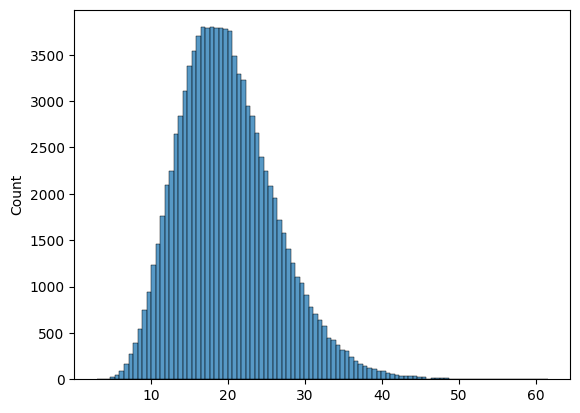

In [6]:
sns.histplot(x1+x2, bins=100);

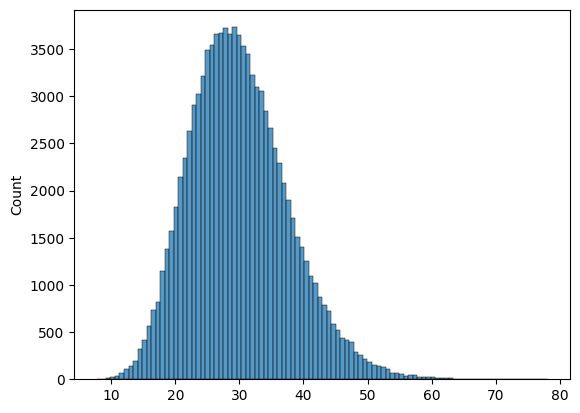

In [7]:
sns.histplot(x1+x2+x3, bins=100);

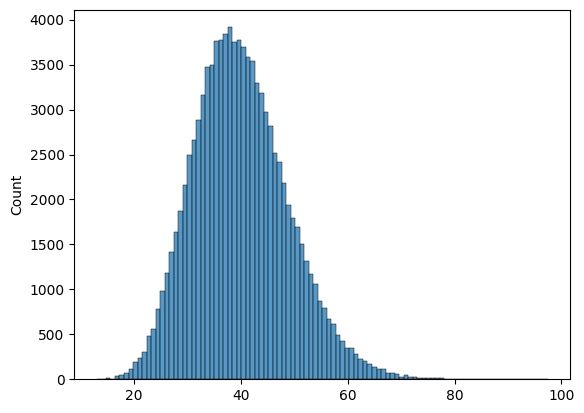

In [8]:
sns.histplot(x1+x2+x3+x4, bins=100);

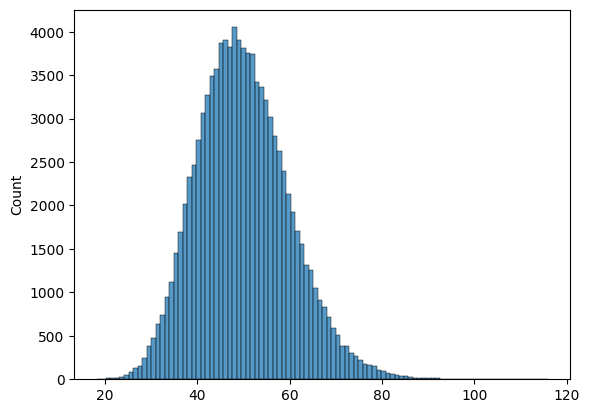

In [9]:
sns.histplot(x1+x2+x3+x4+x5, bins=100);

Видим, что при увелечении количества слагаемых, общее распределение начинает быть похожим на нормальным (в виду центральной предельной теоремы)

#### Уровень значимости $\alpha = 0.05$

In [10]:
def norm_conf_int(alpha, mean_hat, std_hat,  margin=10):
    """Ассимптотический доверительный интервал с уровнем доверия 95%"""

    plt.figure(figsize=(10,8))
    xs = np.linspace(mean_hat-margin, mean_hat+margin)
    pdf = sts.norm(mean_hat,std_hat).pdf(xs)

    plt.plot(xs,pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = sts.norm.interval(1-alpha,loc=mean_hat,scale=std_hat )
    for i in [left,right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle="dashed", linewidth=2)

        if i == left:
            xq = np.linspace(mean_hat-margin, left)
        else:
            xq = np.linspace(right, mean_hat+margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i,2), color="blue", fontsize=14)
        yq = sts.norm(mean_hat,std_hat).pdf(xq)

        plt.fill_between(xq,0,yq,color="red", alpha=0.3)

    return left, right


### Ассимптотические интервалы

Ассимптотический доверительный интервал для среднего значения: (0.7033, 12.72) ширины 12.01, выборка из 10 элементов
Ассимптотический доверительный интервал для среднего значения: (1.431, 18.51) ширины 17.08, выборка из 500 элементов
Ассимптотический доверительный интервал для среднего значения: (1.342, 18.81) ширины 17.47, выборка из 10000 элементов


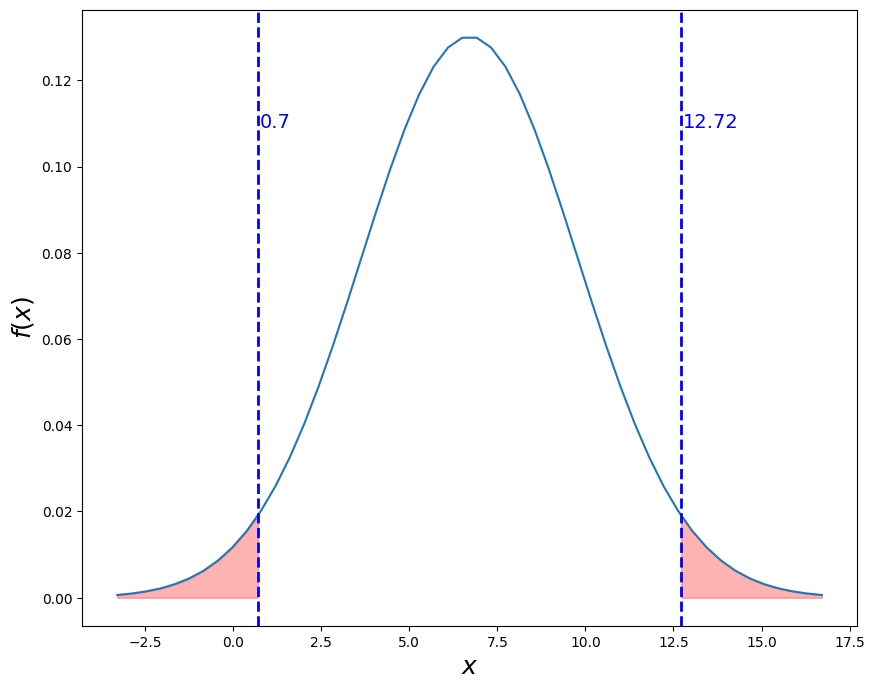

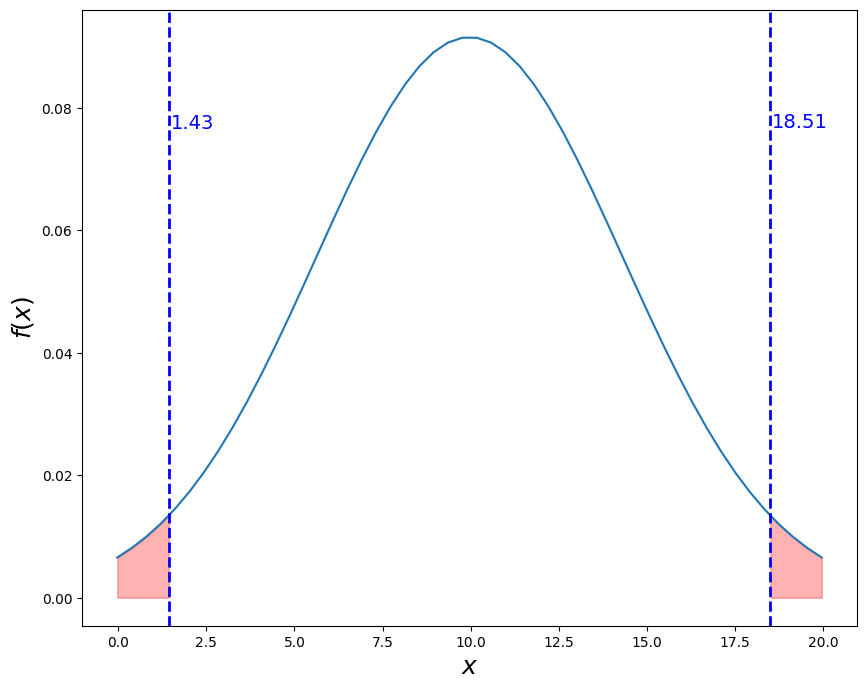

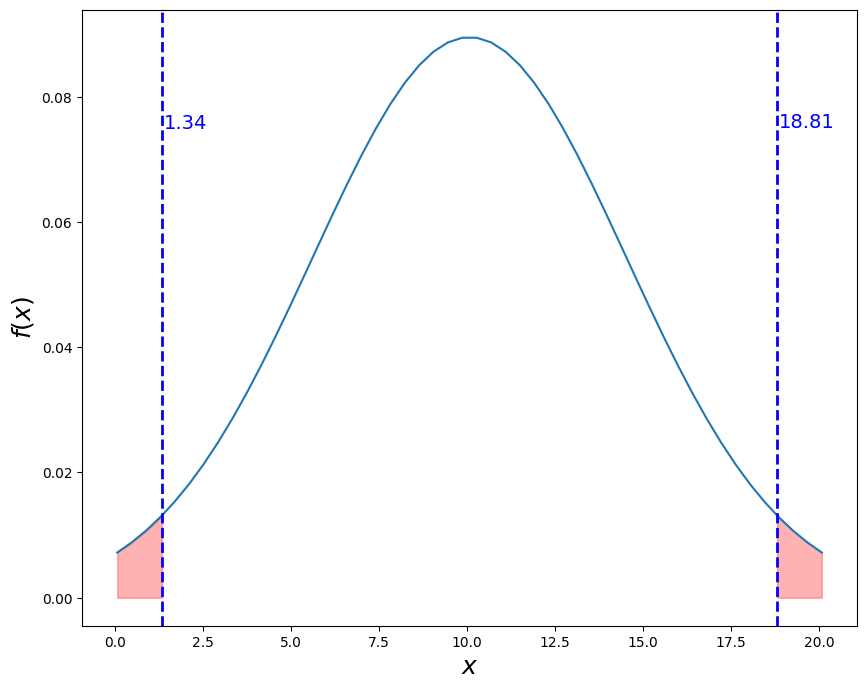

In [11]:
alpha = 0.05
paratemtrs= []
asim_weight = []
for n_obs in n:
    x = chi2.rvs(n_obs)
    
    x_mean = x.mean(axis=0)
    s = (((x - x_mean)**2).mean(axis=0))**0.5
    
    paratemtrs.append((x_mean,s))
    
    left, right = norm_conf_int(alpha, x_mean,s)
    asim_weight.append(right-left)
    print("Ассимптотический доверительный интервал для среднего значения: ({:.4}, {:.4}) ширины {:.4}, выборка из {} элементов".format(
                                                                           left,
                                                                           right,
                                                                           right-left,
                                                                           n_obs))

### Точные интервалы

In [12]:
alpha = 0.05
clear_weight = []
for i, n_obs in enumerate(n):
    t_rv = sts.t(n_obs-1)

    t_critic = t_rv.ppf(1 - alpha/2)
    x_mean, s = paratemtrs[i][0], paratemtrs[i][1]

    left = x_mean - (t_critic * np.sqrt(s**2))
    right = x_mean + (t_critic * np.sqrt(s**2))

    clear_weight.append(right-left)    

    print("Точный доверительный интервал для среднего значения: ({:.4}, {:.4}) ширины {:.4}, выборка из {} элементов".format(
                                                                           left,
                                                                           right,
                                                                           (right-left),
                                                                           n_obs))

Точный доверительный интервал для среднего значения: (-0.2228, 13.64) ширины 13.87, выборка из 10 элементов
Точный доверительный интервал для среднего значения: (1.411, 18.53) ширины 17.12, выборка из 500 элементов
Точный доверительный интервал для среднего значения: (1.341, 18.81) ширины 17.47, выборка из 10000 элементов


In [13]:
print(asim_weight)
print(clear_weight)

[12.013655263554046, 17.077164826404665, 17.46776567716651]
[13.865956986718505, 17.118685809449545, 17.46988037693906]


#### Видим, что для точных доверительных интервалов ширина интервала больше, чем для ассимптотических

### Теперь рассмотрим эфроновы доверительные интервалы для среднего, медианы, моды, дисперсии

100%|██████████| 10000/10000 [00:01<00:00, 7048.49it/s]


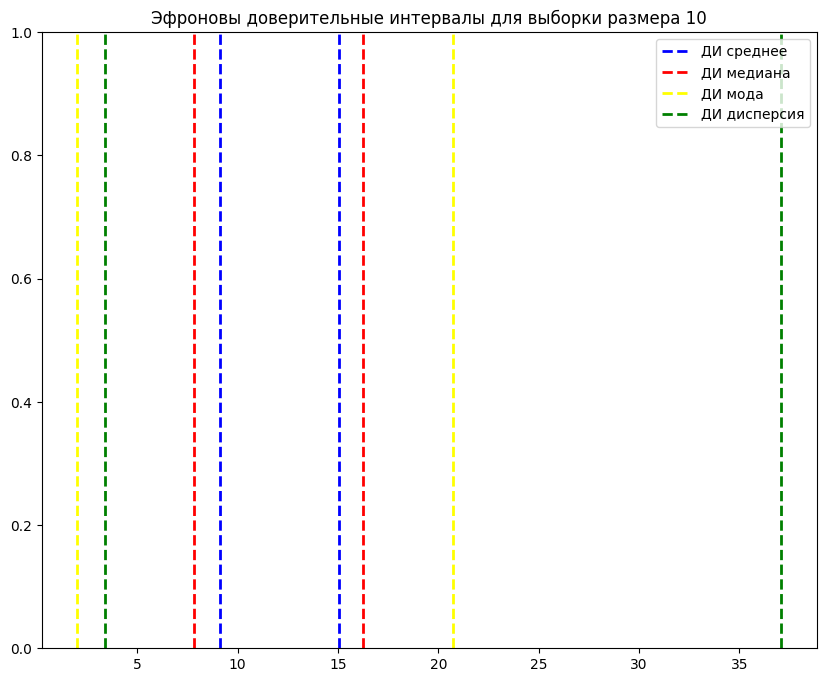

100%|██████████| 10000/10000 [00:01<00:00, 5702.72it/s]


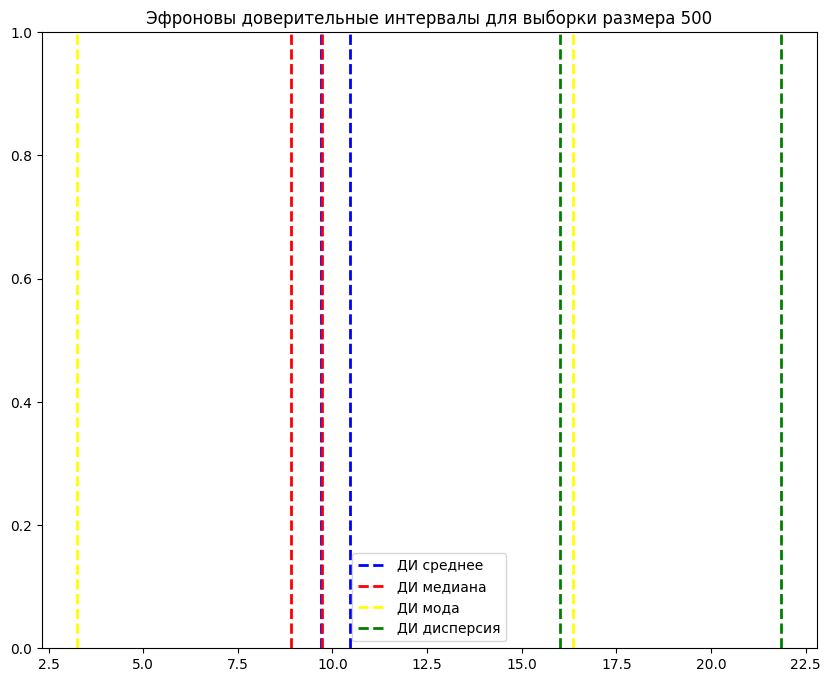

100%|██████████| 10000/10000 [00:10<00:00, 959.29it/s]


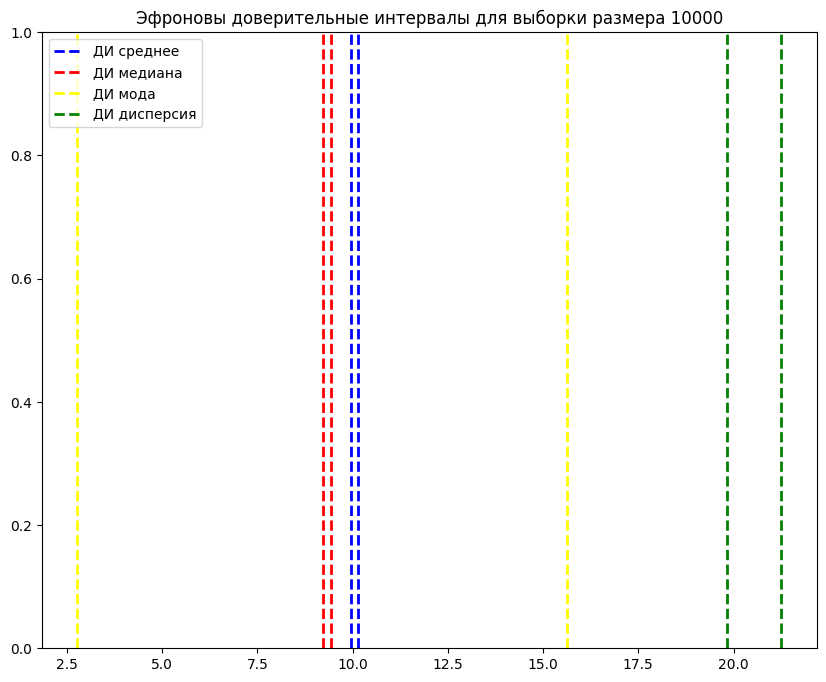

In [14]:
for x in X:
    mean_list = []
    median_list = []
    mode_list = []
    variance_list = []

    mean = np.mean(x)
    median = np.median(x)
    mode = sts.mode(x)
    var = np.var(x)
    
    for _ in tqdm(range(10000)):
        x_ = np.random.choice(x, size=len(x), replace=True)
        mean_list.append(x_.mean())
        median_list.append(np.median(x_))
        mode_list.append(sts.mode(x_))
        variance_list.append(x_.var())

    mean_per = np.percentile(mean_list, q=[2.5, 97.5]).round(2)
    median_per = np.percentile(median_list, q=[2.5, 97.5]).round(2)
    mode_per = np.percentile(mode_list, q=[2.5, 97.5]).round(2)
    var_per = np.percentile(variance_list, q=[2.5, 97.5]).round(2)

    plt.figure(figsize=(10,8))
    
    for i in range(2):
        plt.axvline(mean_per[i], color="blue", linestyle="dashed", linewidth=2, label='ДИ mean')
        plt.axvline(median_per[i], color="red", linestyle="dashed", linewidth=2, label='ДИ median')
        plt.axvline(mode_per[i], color="yellow", linestyle="dashed", linewidth=2, label = 'ДИ mode')
        plt.axvline(var_per[i], color="green", linestyle="dashed", linewidth=2, label = 'ДИ variance')
   
    
    plt.legend(['ДИ среднее', 'ДИ медиана', 'ДИ мода', 'ДИ дисперсия'])
    plt.title(f'Эфроновы доверительные интервалы для выборки размера {len(x)}')
    plt.show();


1. Для выборок разного размера интервалы для моды остается одинковым
2. Медиана и среднее при увелечении выборки стремятся к 10, соответственно сжимая интервал
3. Интервал для дисперсии также при увелечении размера выборки сужается, его левый конец приближается к 20.

In [15]:
data = []
for i, x in enumerate(X):
    res = []
    res.append(len(x))
    res.append(asim_weight[i])
    res.append(clear_weight[i])
    res.append(np.mean(x))
    res.append(np.median(x))
    res.append(sts.mode(x)[0])
    res.append(np.var(x))
    data.append(res)

In [16]:
df = pd.DataFrame(data=data, columns=['Размер выборки', 'Ширина ассимптотического дов. интервала', 'Ширина точного дов. интервала', 'Среднее', 'Медиана', 'Мода', 'Дисперсия'])

In [17]:
df['Мода'] = df['Мода'].astype(float).round(3)

In [18]:
df

,Размер выборки,Ширина ассимптотического дов. интервала,Ширина точного дов. интервала,Среднее,Медиана,Мода,Дисперсия
0,10,12.013655,13.865957,11.859297,11.252121,6.180,23.237520
1,500,17.077165,17.118686,10.080942,9.351696,0.684,18.877711
2,10000,17.467766,17.469880,10.050530,9.336141,0.678,20.526870


#### Выше представлены все характеристики, которые были получены для выборок разного размера